### Approximation to the distribution of a non-central chi-square

Say we have $n$ independent normal variables $Y_i \sim \mathcal{N}(\mu_i,1)$. 
Then the distribution of $\|Y\|^2$ is a noncentral chi-square with $n$ degrees 
of freedom and noncentrality parameter $\|\mu\|^2$. In this notebook we show 
that the distribution of 

$$
T = \frac{\|Y\|^2 - n}{\sqrt{2n}}
$$

is well approximated by 

$$
\mathcal{N}\left(\theta, 1 + \frac{\theta}{\sqrt{n/8}}\right), \qquad \theta = \frac{\|\mu\|^2}{\sqrt{2n}}.
$$



In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import chi2

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
def sample_nc2x(theta=0,df=100,size=1000):
    nc = theta * np.sqrt(2 * df)
    Y = chi2.rvs(df - 1, size=size)
    Z = norm.rvs(size=size)
    Y += nc + 2 * np.sqrt(nc) * Z + Z ** 2
    return Y

df = 10_000
theta_list = [0,0.1,0.25,0.5,1.,2.,4.]
samples = dict.fromkeys(theta_list)

for theta in theta_list:
    Y = sample_nc2x(theta=theta,df=df,size=1_000_000)
    samples[theta] = (Y - df)/np.sqrt(2*df)

    

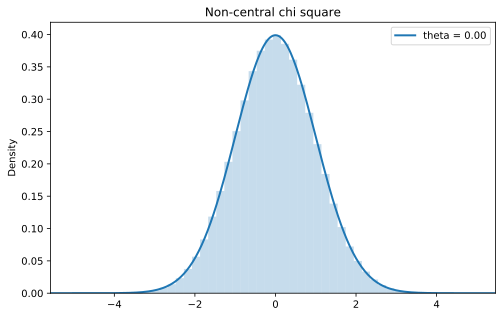

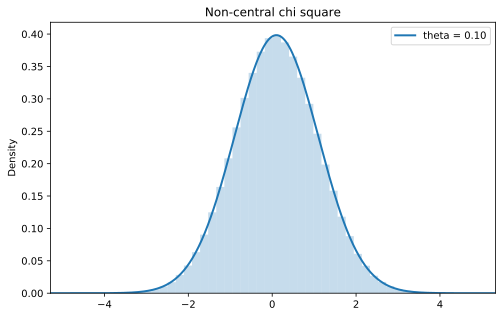

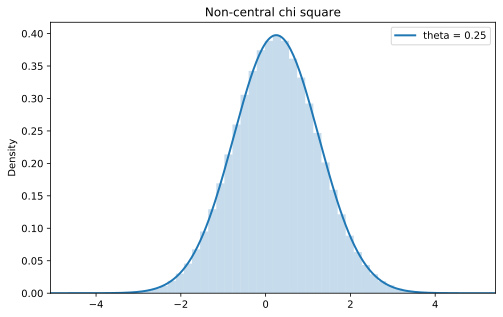

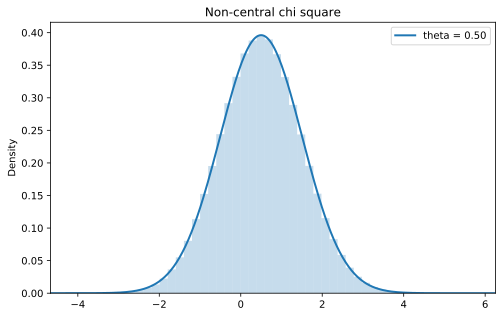

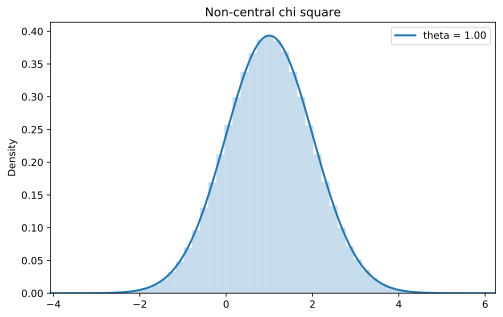

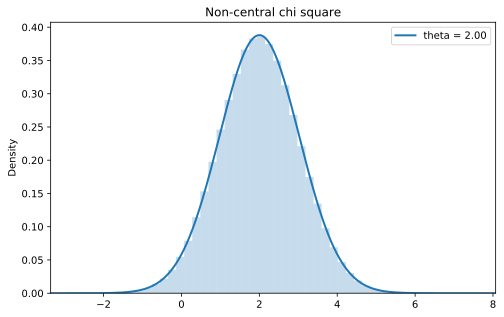

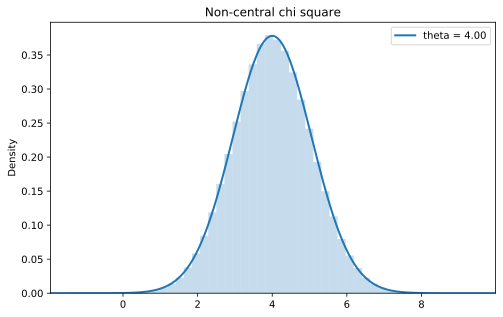

In [3]:
for theta in samples.keys():
    # parameterise our distributions
    d1 = norm(theta, np.sqrt(1 + theta/np.sqrt(df/8)))
    # create new figure with size given explicitly
    plt.figure(figsize=(8, 5))
    y = samples[theta]
    # add histogram showing individual components
    plt.hist(y, 50, density=True, alpha=0.25, edgecolor='none')

    # get X limits and fix them
    mn, mx = plt.xlim()
    plt.xlim(mn, mx)

    # add our distribution to figure
    x = np.linspace(mn, mx, 301)
    plt.plot(x, d1.pdf(x), color='C0',lw=2,label='theta = {:.2f}'.format(theta))
    plt.legend()
    plt.title('Non-central chi square')
    plt.ylabel('Density')
    filename = 'non-central-chi2_' + str(theta) + '.png'
    # plt.savefig(filename)
    plt.show()

